### auto(매주목요일)Crawling_TelegramBot_RealMomentum_PortFolioScore_ 주식vs채권vs현금 분산투자전략

### 매월 4주 구분하고 매주 목요일 매매

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

# Finance Library import
import os
import sys
sys.path.append("C:\\DualMomentum\\BackTesting")
from Library import FinanceLibrary as fl
sys.path.append("C:\DualMomentum\Crawling")
import ETFCrawling as crawling

### 크롤링하기

In [2]:
# kodex200, 국고채10년, 국고채3변 크롤링 하기
crawling.kodex200()
crawling.bond10()
crawling.bond3()

##### File 읽어오기

In [3]:
df_kodex = pd.read_csv("..\\Data\\KODEX200_data.csv", encoding="utf-8", engine="python")
df_bond10 = pd.read_csv("..\\Data\\KOSEF국고채10년_data.csv", encoding="utf-8", engine="python")
df_bond3 = pd.read_csv("..\\Data\\KOSEF국고채3년_data.csv", encoding="utf-8", engine="python")

##### KODEX 주간데이터 만들기

In [4]:
df_kodex["Date"] = pd.to_datetime(df_kodex["Date"])  # Converting date to pandas datetime format
df_kodex["Year"] = df_kodex["Date"].dt.year  # Getting year number
df_kodex["Month"] = df_kodex["Date"].dt.month  # Getting month number
df_kodex["Week_Number"] = df_kodex["Date"].dt.week  # Getting week number
df_kodex["WeekDay"] = df_kodex["Date"].dt.weekday  # Getting weekday number
df_kodex.index = pd.to_datetime(df_kodex["Date"])
df_kodex = df_kodex.drop(["Date"], axis=1)

In [5]:
# 국고채10년 데이터 시작주인 2011-11-20일 데이터 만들기
df_kodex = df_kodex[df_kodex.index >= "2011-11-20"]
# 목요일 데이터 만들기
df_kodex_Thursday = df_kodex[df_kodex["WeekDay"] == 3]
# 1,2,3,4주차 목요일 데이터 만들기
kodex_Aport = df_kodex_Thursday[df_kodex_Thursday["Week_Number"]%4 == 1].copy()  # 매주 1주
kodex_Bport = df_kodex_Thursday[df_kodex_Thursday["Week_Number"]%4 == 2].copy()  # 매주 2주
kodex_Cport = df_kodex_Thursday[df_kodex_Thursday["Week_Number"]%4 == 3].copy()  # 매주 3주
kodex_Dport = df_kodex_Thursday[df_kodex_Thursday["Week_Number"]%4 == 0].copy()  # 매주 4주

##### 국채10년 주간데이터 만들기

In [6]:
df_bond10["Date"] = pd.to_datetime(df_bond10["Date"])  # Converting date to pandas datetime format
df_bond10["Year"] = df_bond10["Date"].dt.year  # Getting year number
df_bond10["Month"] = df_bond10["Date"].dt.month  # Getting month number
df_bond10["Week_Number"] = df_bond10["Date"].dt.week  # Getting week number
df_bond10["WeekDay"] = df_bond10["Date"].dt.weekday
df_bond10.index = pd.to_datetime(df_bond10["Date"])
df_bond10 = df_bond10.drop(["Date"], axis=1)

In [7]:
# 국고채10년 데이터 시작주인 2011-11-20일 데이터 만들기
df_bond10 = df_bond10[df_bond10.index >= "2011-11-20"]
# 목요일 데이터 만들기
df_bond10_Thursday = df_bond10[df_bond10["WeekDay"] == 3]
# 1,2,3,4주차 목요일 데이터 만들기
bond10_Aport = df_bond10_Thursday[df_bond10_Thursday["Week_Number"]%4 == 1].copy()
bond10_Bport = df_bond10_Thursday[df_bond10_Thursday["Week_Number"]%4 == 2].copy()
bond10_Cport = df_bond10_Thursday[df_bond10_Thursday["Week_Number"]%4 == 3].copy()
bond10_Dport = df_bond10_Thursday[df_bond10_Thursday["Week_Number"]%4 == 0].copy()

##### 국채3년 주간데이터 만들기

In [8]:
df_bond3["Date"] = pd.to_datetime(df_bond3["Date"])  # Converting date to pandas datetime format
df_bond3["Year"] = df_bond3["Date"].dt.year  # Getting year number
df_bond3["Month"] = df_bond3["Date"].dt.month  # Getting month number
df_bond3["Week_Number"] = df_bond3["Date"].dt.week  # Getting week number
df_bond3["WeekDay"] = df_bond3["Date"].dt.weekday
df_bond3.index = pd.to_datetime(df_bond3["Date"])
df_bond3 = df_bond3.drop(["Date"], axis=1)

In [9]:
# 국고채10년 데이터 시작주인 2011-11-20일 데이터 만들기
df_bond3 = df_bond3[df_bond3.index >= "2011-11-20"]
# 목요일 데이터 만들기
df_bond3_Thursday = df_bond3[df_bond3["WeekDay"] == 3]
# 1,2,3,4주차 목요일 데이터 만들기
bond3_Aport = df_bond3_Thursday[df_bond3_Thursday["Week_Number"]%4 == 1].copy()
bond3_Bport = df_bond3_Thursday[df_bond3_Thursday["Week_Number"]%4 == 2].copy()
bond3_Cport = df_bond3_Thursday[df_bond3_Thursday["Week_Number"]%4 == 3].copy()
bond3_Dport = df_bond3_Thursday[df_bond3_Thursday["Week_Number"]%4 == 0].copy()

##### re-scale

In [10]:
kodex_Aport["ReClose"] = kodex_Aport["Close"]/kodex_Aport["Close"].iloc[0]
bond10_Aport["ReClose"] = bond10_Aport["Close"]/bond10_Aport["Close"].iloc[0]
bond3_Aport["ReClose"] = bond3_Aport["Close"]/bond3_Aport["Close"].iloc[0]

In [11]:
kodex_Bport.loc[:,"ReClose"] = kodex_Bport["Close"]/kodex_Bport["Close"].iloc[0]
bond10_Bport.loc[:,"ReClose"] = bond10_Bport["Close"]/bond10_Bport["Close"].iloc[0]
bond3_Bport.loc[:,"ReClose"] = bond3_Bport["Close"]/bond3_Bport["Close"].iloc[0]

In [12]:
kodex_Cport.loc[:,"ReClose"] = kodex_Cport["Close"]/kodex_Cport["Close"].iloc[0]
bond10_Cport.loc[:,"ReClose"] = bond10_Cport["Close"]/bond10_Cport["Close"].iloc[0]
bond3_Cport.loc[:,"ReClose"] = bond3_Cport["Close"]/bond3_Cport["Close"].iloc[0]

In [13]:
kodex_Dport.loc[:,"ReClose"] = kodex_Dport["Close"]/kodex_Dport["Close"].iloc[0]
bond10_Dport.loc[:,"ReClose"] = bond10_Dport["Close"]/bond10_Dport["Close"].iloc[0]
bond3_Dport.loc[:,"ReClose"] = bond3_Dport["Close"]/bond3_Dport["Close"].iloc[0]

##### 투자 데이타를 포트폴리오 변수로 넘김

In [14]:
# week number 구하기
t = dt.today()
week_number = t.isocalendar()[1]
week_number = int(week_number / 4)

In [15]:
wl = [["kodex_Dport","bond10_Dport","bond3_Dport"],["kodex_Aport","bond10_Aport","bond3_Aport"],\
      ["kodex_Bport","bond10_Bport","bond3_Bport"],["kodex_Cport","bond10_Cport","bond3_Cport"]]

# 전략포트폴리오 주 선택하기

In [16]:
# 전략포트폴리오 주 선택하기
KODEX = kodex_Dport.copy()
BOND10 = bond10_Dport.copy()
BOND3 = bond3_Dport.copy()

#### 주식, 국채10년, 국채3년 수익률

In [17]:
KODEX.loc[:,"Return"] = fl.YesterdayReturn(KODEX.loc[:,"ReClose"])
BOND10.loc[:,"Return"] = fl.YesterdayReturn(BOND10.loc[:,"ReClose"])
BOND3.loc[:,"Return"] = fl.YesterdayReturn(BOND3.loc[:,"ReClose"])

# Momentum? 6months

In [18]:
# KODEX 평균모멘텀 스코어, 기간설정
KODEX["Avg Mo-Score"] = fl.AverageMomentumScore(KODEX["ReClose"],6)
BOND10["Avg Mo-Score"] = fl.AverageMomentumScore(BOND10["ReClose"],6)

### Real Momentum 사용하기

In [19]:
KODEX["Real Mo-Score"] = fl.RealMomentumScore(KODEX["ReClose"],BOND3["ReClose"],6)
BOND10["Real Mo-Score"] = fl.RealMomentumScore(BOND10["ReClose"],BOND3["ReClose"],6)

# 투자 비중 = KODEX평균모멘텀 스코어 / ( KODEX 12개월 평균 모멘텀 + BOND10 12개월 평균 모멘텀 + 현금비율)
Cash_Score = 1  # 현금비율, 1(안정), 0.5(중간), 0.25(위험)
KODEX["Ratio"] = KODEX["Real Mo-Score"]/ (KODEX["Real Mo-Score"] + BOND10["Real Mo-Score"]  + Cash_Score)
BOND10["Ratio"] = BOND10["Real Mo-Score"]/ (KODEX["Real Mo-Score"] + BOND10["Real Mo-Score"] + Cash_Score)
# 최종적으로 "1 - 사전비율"은 현금성 자산인 BOND3의 비율이 된다.
BOND3["Ratio"] = 1 - (BOND10["Ratio"] + KODEX["Ratio"])

# PortFolio Score 비율투자

In [20]:
PortFolio = pd.DataFrame()
PortFolio["PreScore"] = KODEX["Ratio"] + BOND10["Ratio"]

### Pre 투자수익

In [21]:
# 모멘텀비중 투자, 수익률 YesterdayReturn임으로 투자비율은 어제것을 가지고 와서 계산한다.
PortFolio["Pre수익"] = (KODEX["Return"] * KODEX["Ratio"].shift(1)) + (BOND10["Return"] * BOND10["Ratio"].shift(1))\
            + (BOND3["Return"] * BOND3["Ratio"].shift(1))
PortFolio["Pre수익"][0] = 1  # 첫 NaN값을 "1"로 채워준다
PortFolio["Pre누적수익"] = np.cumprod(PortFolio["Pre수익"])  # 누적 수익률 = 마켓스코어만큼 투자하고 나머지 현금으로 보유
PortFolio["Pre누적수익"][0] = 1  # 첫 NaN값을 "1"로 채워준다
# 동일비중 투자
PortFolio["균등수익"] = KODEX["Return"] * 1/3 + BOND10["Return"] * 1/3 + BOND3["Return"] * 1/3
PortFolio["균등누적수익"] = np.cumprod(PortFolio["균등수익"]) # 누적 수익률 = 마켓스코어만큼 투자하고 나머지 현금으로 보유

# 수익곡선 포트폴리오, 기간 6개월

In [22]:
# 모멘텀 투자
PortFolio["PortRatio"] = fl.AverageMomentumScore(PortFolio["Pre누적수익"],6)
PortFolio["CashRatio"] = 1 - PortFolio["PortRatio"]
# 포트폴리오 수익률 그래프 스코어 계산후 적용은 어제것을 사용한다. Return만 현재이고 Ratio도 어제것을 사용한다.
PortFolio["PortReturn"] = PortFolio["PortRatio"].shift(1) * (KODEX["Return"] * KODEX["Ratio"].shift(1) + (BOND10["Return"]* BOND10["Ratio"].shift(1))\
            + (BOND3["Return"] * BOND3["Ratio"].shift(1)))
PortFolio["PortCashReturn"] = PortFolio["CashRatio"].shift(1) * BOND3["Return"]
PortFolio["Port최종수익"] = PortFolio["PortReturn"] + PortFolio["PortCashReturn"]
PortFolio["Port최종누적수익"] = np.cumprod(PortFolio["Port최종수익"])  # 누적 수익률 = 마켓스코어만큼 투자하고 나머지 현금으로 보유
PortFolio["Port최종누적수익"][0] = 1  # 첫 NaN값을 "1"로 채워준다

In [23]:
# csv로 저장
#PortFolio.to_csv("PortFolio.csv",sep=",",encoding="euc-kr")

##### 포트폴리오 성과 비교하기

In [24]:
kodex = fl.Portfolio(KODEX["ReClose"],"KODEX")
bond10 = fl.Portfolio(BOND10["ReClose"],"BOND10")
cash = fl.Portfolio(BOND3["ReClose"],"CASH")
pre = fl.Portfolio(PortFolio["Pre누적수익"],"Pre누적수익")
port = fl.Portfolio(PortFolio["Port최종누적수익"],"Port최종누적수익")
균등 = fl.Portfolio(PortFolio["균등누적수익"],"균등누적수익")

result = pd.concat([kodex,bond10,cash,pre,port,균등],axis=1)
pd.DataFrame(result).T

,Initial Balnce,Final Balance,CAGR,Std,Max.Drawdown,Sharpe Ratio
KODEX,1.000000,1.251420,2.5233,0.134583,-20.7216,0.083396
BOND10,1.000000,1.385602,3.6902,0.117111,-8.3670,0.287016
CASH,1.000000,1.232921,2.3538,0.068512,-1.3553,0.636369
Pre누적수익,1.000000,1.269427,2.6862,0.089670,-3.9651,0.255083
Port최종누적수익,1.000000,1.211375,2.1535,0.071460,-3.8112,0.247060
균등누적수익,0.988667,1.309580,3.1727,0.097091,-4.7762,0.240365


### 그래프

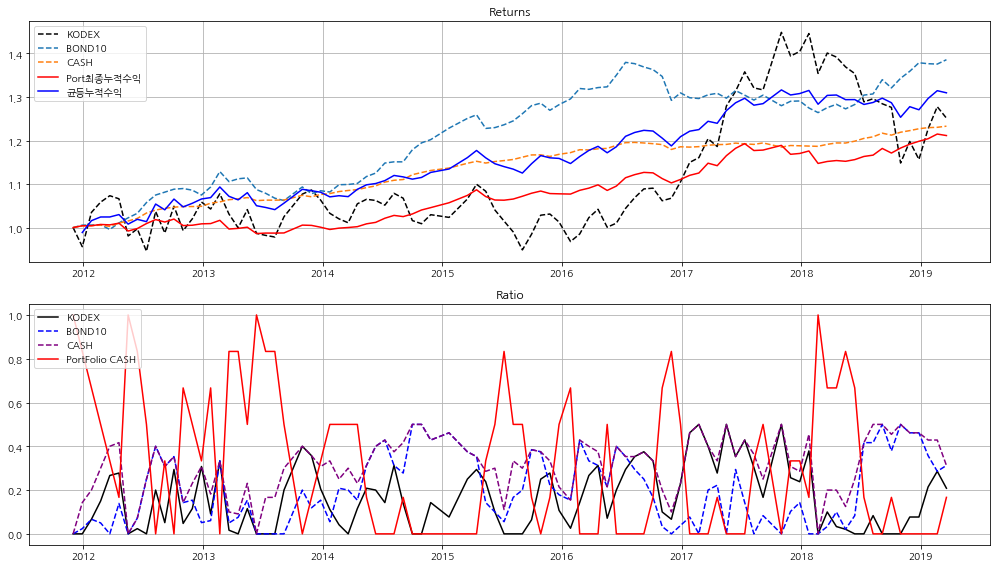

In [25]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#한글폰트사용하기
from matplotlib import rc, font_manager
import matplotlib
rc("font", family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.set_title("Returns")
ax1.plot(KODEX["ReClose"],color="Black",linestyle="--",label="KODEX")
ax1.plot(BOND10["ReClose"],linestyle="--",label="BOND10")
ax1.plot(BOND3["ReClose"],linestyle="--",label="CASH")
ax1.plot(PortFolio["Port최종누적수익"],color="Red",label="Port최종누적수익")
ax1.plot(PortFolio["균등누적수익"],color="Blue",label="균등누적수익")
ax1.grid()
ax1.legend(loc=2)

ax2.set_title("Ratio")
ax2.plot(PortFolio["PortRatio"]*KODEX["Ratio"],color="Black", label="KODEX")
ax2.plot(PortFolio["PortRatio"]*BOND10["Ratio"], color="Blue", linestyle="--",label="BOND10")
ax2.plot(PortFolio["PortRatio"]*BOND3["Ratio"], color="Purple", linestyle="--",label="CASH")
ax2.plot(PortFolio["CashRatio"], color="Red",label="PortFolio CASH")
ax2.grid()
ax2.legend(loc=2)

# 차트끼리 충돌을 방지합니다.
plt.tight_layout()
plt.savefig("../Img/PortFolio.jpg")

# TelegramBot 보내기

In [26]:
import sys
# ChatBot Library import
import os
import sys
sys.path.append("C:\\DualMomentum\\Telegram")
import ChatBotModel

In [27]:
# 봇 기능 만들기
def proc_PORT(bot, update):
    DUAL.sendMessage(text="PortFolio")

# 텔레그램 봇 생성하기
DUAL = ChatBotModel.BotDual()

### 자산별 배분 구하기

##### Capital, Quarter 금액선정

In [28]:
# 자본금 설정, 매달 한번 트레이딩 할때 사용할 변수 Capital
Capital = 11280000 #단위:천백만이십팔만원
# 매월 4주 트레이딩 할때 사용할 변수 Quarter
Quarter = int(Capital / 4)

In [29]:
# 종목별 가격
kodex_close = KODEX["Close"]
bond10_close = BOND10["Close"]
bond3_close = BOND3["Close"]

In [30]:
CapitalRatio = pd.DataFrame()
CapitalRatio["Cash Ratio"] = np.round(PortFolio["CashRatio"],2)
CapitalRatio["KODEX Ratio"] = np.round(PortFolio["PortRatio"] * KODEX["Ratio"],2)
CapitalRatio["BOND10 Ratio"] = np.round(PortFolio["PortRatio"] * BOND10["Ratio"],2)
CapitalRatio["BOND3 Ratio"] = np.round(PortFolio["PortRatio"] * BOND3["Ratio"],2)

In [31]:
# 자산 비율 * 자산 금액 / 종목가격 = 구매수량
# 전체 자산을 가지고 또는 4등분하여 매주 포트폴리오 하는지 결정한다 Capital, Quarter
CapitalRatio["kodex count"] = CapitalRatio["KODEX Ratio"].apply(lambda x: x * Quarter) / kodex_close
CapitalRatio["bond10 count"] = CapitalRatio["BOND10 Ratio"].apply(lambda x: x * Quarter) / bond10_close
CapitalRatio["bond3 count"] = CapitalRatio["BOND3 Ratio"].apply(lambda x: x * Quarter) / bond3_close
CapitalRatio["cash count"] = CapitalRatio["Cash Ratio"].apply(lambda x: x * Quarter) / bond3_close
# 구매수량 int
CapitalRatio["kodex count"] = CapitalRatio["kodex count"].apply(lambda x: int(x))
CapitalRatio["bond10 count"] = CapitalRatio["bond10 count"].apply(lambda x: int(x))
CapitalRatio["bond3 count"] = CapitalRatio["bond3 count"].apply(lambda x: int(x))
CapitalRatio["cash count"] = CapitalRatio["cash count"].apply(lambda x: int(x))

In [32]:
count_yesterday = CapitalRatio.iloc[-2].values
count_today = CapitalRatio.iloc[-1].values

In [33]:
# CapitalRatio 구조 : Cash Ratio	KODEX Ratio	BOND10 Ratio	BOND3 Ratio	kodex count	bond10 count	bond3 count	cash count

In [34]:
re_ratio = "투자비율은 KODEX : {}, BOND10 : {}, BOND3 : {}, Cash : {}".format(\
            count_today[1], count_today[2], count_today[3], count_today[0])

In [35]:
re_balance = "구매수량은 KODEX : {}({}), BOND10 : {} ({}), BOND3 : {} ({}), Cash : {} ({})".format(\
            count_today[4], count_today[4] - count_yesterday[4],\
            count_today[5], count_today[5] - count_yesterday[5],\
            count_today[6], count_today[6] - count_yesterday[6],\
            count_today[7], count_today[7] - count_yesterday[7])

### 메세지 보내기

In [36]:
to_day = "오늘 날자는 {}이고 {}월 {}주차 이다".format(\
        dt.now().strftime("%Y-%m-%d"), dt.now().strftime("%m"), week_number)
money = "금주 투자금액은 총{:,}원에서 {:,}원 금액 만큼 매매 한다".format(\
        Capital, Quarter)

In [37]:
DUAL.sendMessage(to_day)
DUAL.sendMessage(money)
DUAL.sendMessage(re_balance)
DUAL.sendMessage(re_ratio)
DUAL.sendPhoto(open("../Img/PortFolio.jpg", "rb"))